<p><i> Created by Akib Mashrur </i><p>
<b><p style="font-size:20px;">Task A- Clustering</p></b>
<p> <b> Criteria 1: </b> </p>
<p> <body> Task: Reading files corresponding to the feature matrix, class labels and the term dictionary and store them in variables X, true Labels and terms using Python notebook </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    In the cell below, firstly all required dependencies for the asignment has been imported. And finally, the 3 files in the dataset corresponding to the feature matrix, the class labels and the term dictionary has been stored as variable X, trueLabels, and terms.
</body> </p>

In [1]:
# installing relevant dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score


#for implementing K-Means with Cosine Distance Measure
from nltk import cluster
from nltk.cluster.kmeans import KMeansClusterer

from wordcloud import WordCloud

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
%matplotlib inline

#Reading and storing files

X = pd.read_csv("bbcsport_mtx.csv",header=None).values
true_labels = pd.read_csv("bbcsport_classes.csv",header=None).values
terms = pd.read_csv("bbcsport_terms.csv",header=None).values

<p> <b> Criteria 2: </b> </p>
<p> <body> Task 1: Perform K-Means clustering with 5 clusters using Euclidean distance as similarity measure </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    In this approach k-means clustering with k=5, and random initialization has been fitted.
</body> </p>

In [2]:
##Fitting kmeans clustering
kmeans_original = KMeans(n_clusters=5,init='random',random_state=2018)
kmeans_original.fit(X)

#storing centroids and labels
centroids_original = kmeans_original.cluster_centers_
labels_original = kmeans_original.labels_

#squeezing true_labels into similar array type as sklearn provided labels for evaluation
ground_truth = np.squeeze(np.asarray(true_labels))

<p> <body> Task 2: Evaluate the clustering performance using ARI and AMI. </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
  For this task, the clustering has been evaluated based on Adjusted Random Index and Adjusted Mutual Information  </body> </p>


In [3]:
#squeezing true_labels into similar array type as sklearn provided labels for evaluation
ground_truth = np.squeeze(np.asarray(true_labels))

#Evaluating model against ground truth

ARI = adjusted_rand_score(ground_truth,labels_original)
AMI = adjusted_mutual_info_score(ground_truth,labels_original)

print("ARI for first instance is: ", ARI)
print("AMI for first instance is: ", AMI)

ARI for first instance is:  0.20208683568126978
AMI for first instance is:  0.2584127451392913


<p> <body> Task 3: Report the clustering performance averaged over 50 random initializations of K-means. </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
  For this task, the clustering method has been looped over 50 iterations and final ARI and AMI have been averaged.  </body> </p>

In [4]:
iteration = 50
log_i = []
log_ARI = []
log_AMI = []


for i in range(iteration):
    ##Fitting kmeans clustering
    kmeans = KMeans(n_clusters=5,init='random')
    #Applying Kmeans clustering on decomposed matrix
    kmeans.fit(X)

    #storing centroids and labels
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    ##Evaluating model against ground truth

    ARI = adjusted_rand_score(ground_truth,labels)
    AMI = adjusted_mutual_info_score(ground_truth,labels)
    log_i = np.append(log_i,i+1)
    log_ARI = np.append(log_ARI,ARI)
    log_AMI = np.append(log_AMI,AMI)
    
Average_ARI = np.average(log_ARI)
Average_AMI = np.average(log_AMI)

print("Average ARI over 50 iterations: ", Average_ARI)
print("Average AMI over 50 iterations: ", Average_AMI)

Average ARI over 50 iterations:  0.08112240156153211
Average AMI over 50 iterations:  0.14945935314733835


<p> <b> Criteria 3: </b> </p>
<p> <body> Task 1: Repeat K-Means clustering with 5 clusters using Cosine Distance Measure </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    In this approach k-means clustering with k=5, and random initialization has been fitted using NLTK module which lets us implement k-means clustering with different distance measures easily.
</body> </p>

In [5]:
# Fitting k-means clustering with cosine distance measure
kclusterer = KMeansClusterer(num_means=5, distance=cluster.util.cosine_distance)

#Extracting labels and centroids
labels_nltk = kclusterer.cluster(X, assign_clusters=True)
centroids_nltk = kclusterer._means

<p> <body> Task 2: Report the clustering performance averaged over 50 random initializations of K-means. </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
  For this task, the clustering method have been looped over 50 iterations and final ARI and AMI has been averaged.  </body> </p>

In [6]:
iteration = 50
log_i_cosine = []
log_ARI_cosine = []
log_AMI_cosine = []


for i in range(iteration):
    # Fitting k-means clustering with cosine distance measure
    kclusterer = KMeansClusterer(num_means=5, distance=cluster.util.cosine_distance)

    #Extracting labels and centroids
    labels_nltk = kclusterer.cluster(X, assign_clusters=True)
    centroids_nltk = kclusterer._means

    ##Evaluating model against ground truth

    ARI_cosine = adjusted_rand_score(ground_truth,labels_nltk)
    AMI_cosine = adjusted_mutual_info_score(ground_truth,labels_nltk)
    log_i_cosine = np.append(log_i_cosine,i+1)
    log_ARI_cosine = np.append(log_ARI_cosine,ARI_cosine)
    log_AMI_cosine = np.append(log_AMI_cosine,AMI_cosine)
    
Average_ARI_cosine = np.average(log_ARI_cosine)
Average_AMI_cosine = np.average(log_AMI_cosine)

print("Average ARI over 50 iterations for k-means using cosine distance: ", Average_ARI_cosine)
print("Average AMI over 50 iterations for k-means usine cosine distance ", Average_AMI_cosine)

Average ARI over 50 iterations for k-means using cosine distance:  0.5837746215020123
Average AMI over 50 iterations for k-means usine cosine distance  0.6331031319735382


<p> <body>
  It can be clearly seen that k-means using cosine distance performs far better k-means using euclidean distance for this dataset  </body> </p>

<p> <body> Task 3: Report the clustering performance and compare it with the results obtained in step 2. </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
  For the dataset provided, K-Means using cosine distance measure has been able to cluster more accurately than K-Means using Euclidean Distance measure at every iteration.   </body> </p>

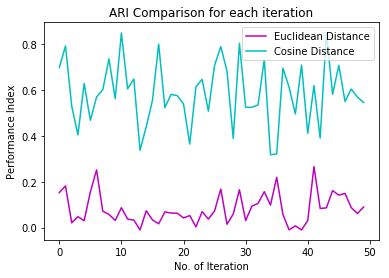

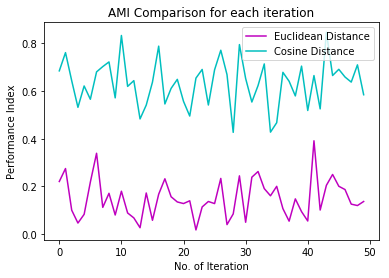

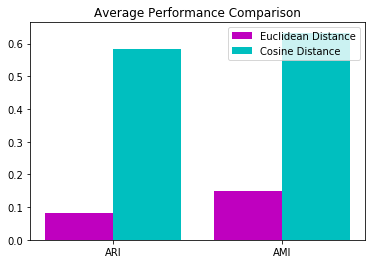

In [7]:
# Plotting each random variation of ARI in line graphs
plt.plot(log_ARI, color = 'm')
plt.plot(log_ARI_cosine, color = 'c')
plt.xlabel("No. of Iteration")
plt.ylabel("Performance Index")
plt.title("ARI Comparison for each iteration")
plt.legend(('Euclidean Distance','Cosine Distance'))
plt.show()

# Plotting each random variation of AMI in line graphs
plt.plot(log_AMI, color = 'm')
plt.plot(log_AMI_cosine, color = 'c')
plt.xlabel("No. of Iteration")
plt.ylabel("Performance Index")
plt.title("AMI Comparison for each iteration")
plt.legend(('Euclidean Distance','Cosine Distance'))
plt.show()

#Plotting all the performance measures in a grouped bar chart

Euclidean = (Average_ARI, Average_AMI)
Cosine = (Average_ARI_cosine, Average_AMI_cosine)

fig, ax = plt.subplots()
ind = np.arange(2)
width = .4
p1 = ax.bar(ind,Euclidean,.4, color = 'm', bottom=0)
p2 = ax.bar(ind+width,Cosine,.4, color = 'c', bottom=0)

ax.set_title('Average Performance Comparison')
ax.set_xticks(ind+width /2)
ax.set_xticklabels(('ARI','AMI'))

ax.legend((p1[0],p2[0]),('Euclidean Distance','Cosine Distance'))
ax.autoscale_view()
plt.show()

<p> <b> Criteria 4: </b> </p>
<p> <body> Task: Visualise cluster centres using WordCloud </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    For this task, first, terms and centroids have been merged into a dictionaries. (with key = terms and values = centroids). Then a Wordcloud generator has been implemented on the merge dictionaries which takes in the centroid values as frequencies.
</body> </p>

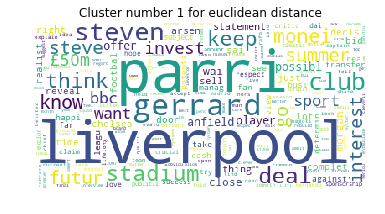

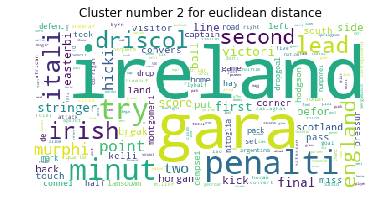

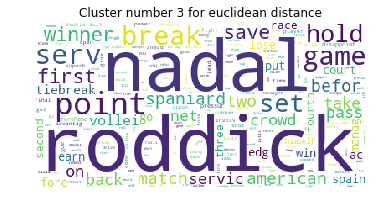

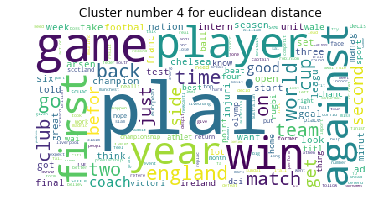

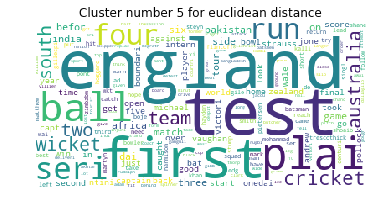

In [8]:
## For centroids obtained using kmeans clustering with euclidean distance

#Merging Centroids and terms to create word clouds
cent_table = np.vstack((terms.T,centroids))
#transforming into list of dictionary since wordcloud accepts dictionaries of words
keys = cent_table[0]
dictionary = [dict(zip(keys, values)) for values in cent_table[1:]]

#Generating wordclouds for each cluster
for cluster in range(5):
    
    n=cluster+1
    wordcloud = WordCloud(background_color="white",).generate_from_frequencies(dictionary[cluster])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Cluster number %i for euclidean distance' %n)
    plt.show()

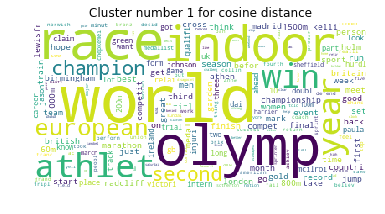

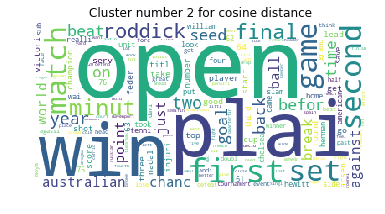

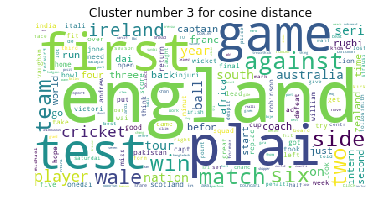

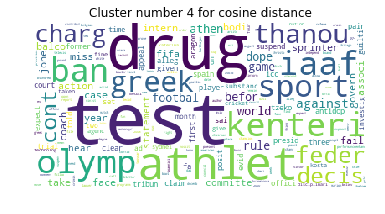

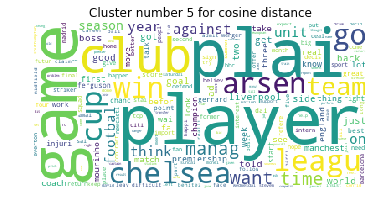

In [9]:
## For centroids obtained using kmeans clustering with cosine distance

#Merging Centroids and terms to create word clouds
cent_table_cosine = np.vstack((terms.T,centroids_nltk))
#transforming into list of dictionary since wordcloud accepts dictionaries of words
keys_cosine = cent_table_cosine[0]
dictionary_cosine = [dict(zip(keys_cosine, values)) for values in cent_table_cosine[1:]]

#Generating wordclouds for each cluster
for cluster_cosine in range(5):
    
    n_cosine = cluster_cosine+1
    wordcloud_cosine = WordCloud(background_color="white",).generate_from_frequencies(dictionary_cosine[cluster_cosine])
    plt.imshow(wordcloud_cosine)
    plt.axis('off')
    plt.title('Cluster number %i for cosine distance' %n_cosine)
    plt.show()

<b><p style="font-size:20px;">Task B- PCA</p></b>
<p> <b> Task 1: </b> </p>
<p> <body> Capture PCA </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    In the cell below, for the feature matrix X, firstly PCA with all components have been implemented to capture cumulative variance of all the dimensions.
</body> </p>

In [3]:
random_seed = 2018

#normalizing the data
Xnorm = scale(X)

pca = PCA(n_components=len(X.T),random_state=random_seed) #instantiating PCA for all dimension to compare variance
X_new = pca.fit(Xnorm) #fitting the PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


<p> <b> Task 2: </b> </p>
<p> <body> Plot captured variance with respect to increasing latent dimensionality </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    Cumulative variance with respect to increasing latent dimensionality has been captured below:
</body> </p>

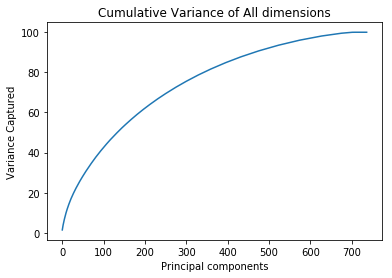

In [4]:
#storing cumulative variance for all PCs
variance=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

#plotting the variance
plt.plot(variance)
plt.xlabel("Principal components")
plt.ylabel("Variance Captured")
plt.title("Cumulative Variance of All dimensions")
plt.show()

<p> <b> Task 3: </b> </p>
<p> <body> What is the minmum dimension that captures (a) atleast 95% variance and (b) atleast 98% variance </body> </p>
<p> <b> Approach: </b> </p>
<p> <body>
    This has been calculated below:
</body> </p>

In [5]:
#Defining a new function to get minimum dimensions
def get_minimum_dimension(variance_list, variance_threshold):

    #counting number of PCs that add up to specified variance threshold
    dim_sum = sum(1 for i in variance_list if i <= variance_threshold)
    print(dim_sum, "dimensions cover", variance_threshold, "% of total variance in the dataset")   

#Minumum Dimension that cover 95% variance:
get_minimum_dimension(variance,95)
#Minumum Dimension that cover 98% variance:
get_minimum_dimension(variance,98)


554 dimensions cover 95 % of total variance in the dataset
626 dimensions cover 98 % of total variance in the dataset
